In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [129]:
df = pd.read_csv(r'/home/kudumularajvardhanreddy/Mine/ML/projects/Loan Status Prediction - Support Vector Machine Model/loan_status_data.csv')

df = df.dropna()

In [130]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [131]:
print(df.isnull().sum())
print('\n')
print('\n')
print(df.describe)
print('\n')
print('\n')
print(df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64




<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
608  LP002978  Female      No          0      Graduate            No   
609  LP002979    Male     Yes         3+      Graduate            No   
61

In [132]:
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
608  LP002978  Female      No          0      Graduate            No   
609  LP002979    Male     Yes         3+      Graduate            No   
610  LP002983    Male     Yes          1      Graduate            No   
611  LP002984    Male     Yes          2      Graduate            No   
612  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

/tmp/ipykernel_7741/745807771.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [133]:
df = df.replace(to_replace='3+', value=4)

df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

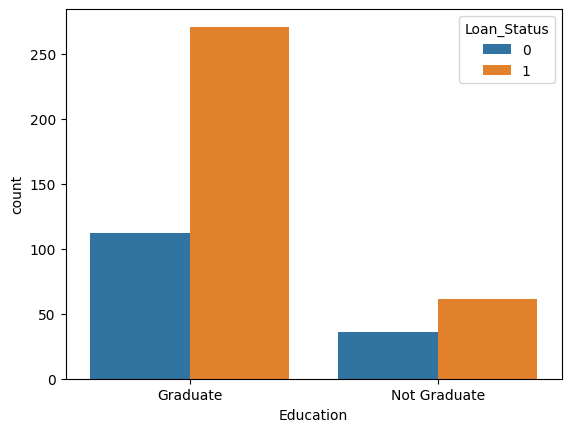

In [134]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

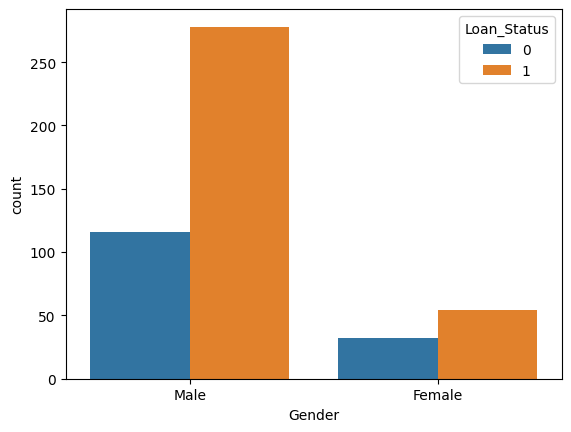

In [135]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

In [136]:
df.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':0, 'Female': 0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate': 0}, 'LoanAmount':{'NaN':0}}, inplace=True)

/tmp/ipykernel_7741/790905769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':0, 'Female': 0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate': 0}, 'LoanAmount':{'NaN':0}}, inplace=True)


In [137]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [138]:
X = df.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
Y = df['Loan_Status']

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        1          1          1              0             4583   
1         0        1          0          1              1             3000   
2         0        1          0          0              0             2583   
3         0        0          0          1              0             6000   
4         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
608       0        0          0          1              0             2900   
609       0        1          4          1              0             4106   
610       0        1          1          1              0             8072   
611       0        1          2          1              0             7583   
612       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state=2)

In [140]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [143]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [149]:
X_train_prediction = classifier.predict(X_train)
X_test_prediction = classifier.predict(X_test)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [150]:
print(training_data_accuracy)
print(test_data_accuracy)

0.7708333333333334
0.8541666666666666
